In [430]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Combine the data into a single dataset and remove drugs outside of scope
mouse_df = pd.read_csv("data/mouse_drug_data.csv")
trial_df = pd.read_csv("data/clinicaltrial_data.csv")
drugs_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"] 
merged_df = trial_df.merge(mouse_df)
comb_df = merged_df[merged_df["Drug"].isin(drugs_list)]

In [441]:
#dataframe to calc average tumor size by drug|timepoint and pivot
avgsize_df = comb_df.groupby(["Drug","Timepoint"], as_index=False)["Tumor Volume (mm3)"].mean().pivot(index="Timepoint", columns= "Drug", values="Tumor Volume (mm3)")

In [383]:
#avg size error for error bars
avgerror_size= comb_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

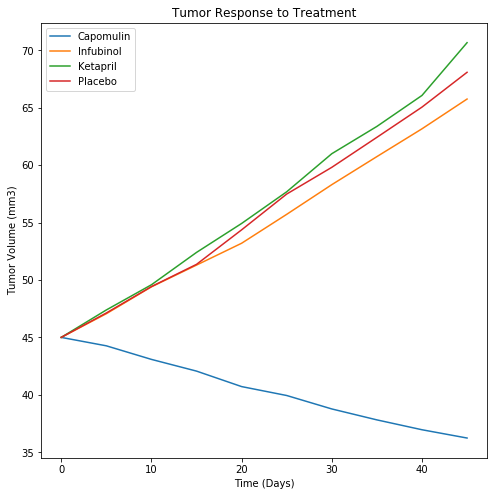

In [438]:
#create size chart
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(avgsize_df)
plt.legend(avgsize_df, loc=2)
plt.rcParams["figure.figsize"] = (9,9)
plt.show()

## Metastatic Response to Treatment

In [442]:
#dataframe to calc average metastasis by drug|timepoint and pivot
avgmeta_df = comb_df.groupby(["Drug","Timepoint"], as_index=False)["Metastatic Sites"].mean().pivot(index="Timepoint", columns= "Drug", values="Metastatic Sites")

In [388]:
#avg metastatic error for error bars
avgerror_meta = comb_df.drop("Mouse ID", axis=1).groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

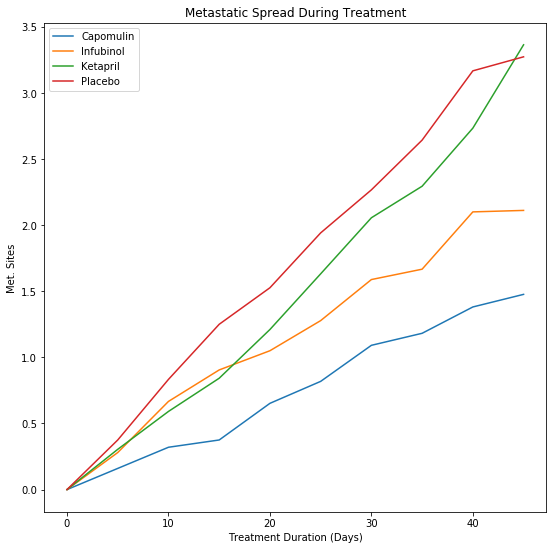

In [439]:
#create metastisis chart
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.plot(avgmeta_df)
plt.legend(avgmeta_df, loc=2)
plt.rcParams["figure.figsize"] = (9,9)
plt.show()

## Survival Rates

In [443]:
#dataframe to count surviving mice by drug|timepoint and pivot
mice_df = comb_df.groupby(["Drug","Timepoint"], as_index=False)["Mouse ID"].count().pivot(index="Timepoint", columns= "Drug", values="Mouse ID")

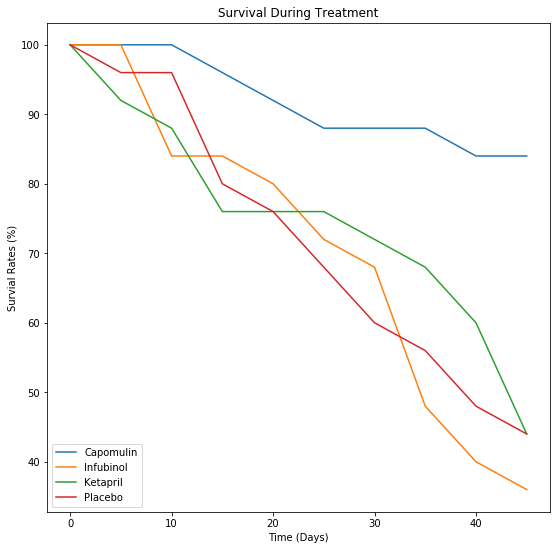

In [440]:
#create survival chart
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survial Rates (%)")
plt.plot(mice_df/25*100)
plt.legend(mice_df, loc=3)
plt.rcParams["figure.figsize"] = (9,9)
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()